In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
from helper_functions import *

# SPZ Mini Challenge 1 
### Data
For this Challenge, we used the Data of [SwissGrid](www.swissgrid.ch), which can be found here: [Energie Übersicht](https://www.swissgrid.ch/en/home/operation/grid-data/transmission.html). 

Of this Data, we use the 15 min resolution because it is the only resolution which has all the information we need. To save time on computing, the data will be upsampled to a 4-hour resolution. For certain tasks, we will use a daily resolution or a montly resolution.

### Budget, Usage and Balance
To generate those features, we do the following:
#### Budget

Addition of `"Summe produzierte Energie Regelblock Schweiz"` and `"Import"`
#### Usage

Addition of `"Summe endverbrauchte Energie Regelblock Schweiz"` and `"Export"`
#### Balance

Subtraction of `"Budget"` - `"Usage"`

## Data Loading and Data Cleaning
In the next couple of steps, we will clean the headers, fix types of certain columns, sample the data and generate the new features.

In [2]:
# Read in Data:
data = load_data('EnergieUebersichtCH-*', 'Zeitreihen0h15')
data.head()

,Unnamed: 0,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
0,Zeitstempel,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01 00:15:00,1829965.532,1328840.011,1923497.62025,535032.369,1051663.768,0,-42000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01 00:30:00,1715172.867,1310517.237,1905593.89825,531262.971,1030932.571,0,-64000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01 00:45:00,1732581.748,1330421.997,1919726.30525,531174.589,1054606.836,0,-52000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01 01:00:00,1706689.208,1303333.914,1891833.42625,534226.167,1036944.249,0,-51000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean Dataframe (Rename columns etc.)
data_clean = data_cleaning(data.copy())
data_clean.head()

,Summe endverbrauchte Energie Regelblock Schweiz,Summe produzierte Energie Regelblock Schweiz,Summe verbrauchte Energie Regelblock Schweiz,Netto Ausspeisung aus dem Übertragungsnetz Schweiz,Vertikale Einspeisung ins Übertragungsnetz Schweiz,Positive Sekundär-Regelenergie,Negative Sekundär-Regelenergie,Positive Tertiär-Regelenergie,Negative Tertiär-Regelenergie,Verbundaustausch CH->AT,...,"Produktion Kantone OW, NW, UR","Verbrauch Kantone OW, NW, UR","Produktion Kantone GE, VD","Verbrauch Kantone GE, VD","Produktion Kantone SH, ZH","Verbrauch Kantone SH, ZH",Produktion Kantonsübergreifend,Verbrauch Kantonsübergreifend,Produktion Regelzone CH - Ausländische Gebiete,Verbrauch Regelzone CH - Ausländische Gebiete
Zeitstempel,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:15:00,1829965.532,1328840.011,1923497.62025,535032.369,1051663.768,0,-42000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:30:00,1715172.867,1310517.237,1905593.89825,531262.971,1030932.571,0,-64000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:45:00,1732581.748,1330421.997,1919726.30525,531174.589,1054606.836,0,-52000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 01:00:00,1706689.208,1303333.914,1891833.42625,534226.167,1036944.249,0,-51000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 01:15:00,1722372.541,1350111.973,1919922.64075,501786.775,1065655.805,0,-24000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Change from CET to UTC:
data_clean_loc = localize_time(data_clean.copy())
data_clean_loc.head()

,Summe endverbrauchte Energie Regelblock Schweiz,Summe produzierte Energie Regelblock Schweiz,Summe verbrauchte Energie Regelblock Schweiz,Netto Ausspeisung aus dem Übertragungsnetz Schweiz,Vertikale Einspeisung ins Übertragungsnetz Schweiz,Positive Sekundär-Regelenergie,Negative Sekundär-Regelenergie,Positive Tertiär-Regelenergie,Negative Tertiär-Regelenergie,Verbundaustausch CH->AT,...,"Produktion Kantone OW, NW, UR","Verbrauch Kantone OW, NW, UR","Produktion Kantone GE, VD","Verbrauch Kantone GE, VD","Produktion Kantone SH, ZH","Verbrauch Kantone SH, ZH",Produktion Kantonsübergreifend,Verbrauch Kantonsübergreifend,Produktion Regelzone CH - Ausländische Gebiete,Verbrauch Regelzone CH - Ausländische Gebiete
Zeitstempel,,,,,,,,,,,,,,,,,,,,,
2008-12-31 23:15:00+00:00,1829965.532,1328840.011,1923497.62025,535032.369,1051663.768,0,-42000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31 23:30:00+00:00,1715172.867,1310517.237,1905593.89825,531262.971,1030932.571,0,-64000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31 23:45:00+00:00,1732581.748,1330421.997,1919726.30525,531174.589,1054606.836,0,-52000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:00:00+00:00,1706689.208,1303333.914,1891833.42625,534226.167,1036944.249,0,-51000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:15:00+00:00,1722372.541,1350111.973,1919922.64075,501786.775,1065655.805,0,-24000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Create Features:
data_clean_loc['Strombudget Schweiz'] = data_clean_loc['Summe produzierte Energie Regelblock Schweiz'] + data_clean_loc['Import']
data_clean_loc['Stromverbrauch Schweiz'] = data_clean_loc['Summe endverbrauchte Energie Regelblock Schweiz'] + data_clean_loc['Export']

data_clean_loc['Strombilanz Schweiz'] = data_clean_loc['Strombudget Schweiz'] - data_clean_loc['Stromverbrauch Schweiz']
# Select useful Features:
data_selected = data_clean_loc[['Strombilanz Schweiz', 'Strombudget Schweiz', 'Stromverbrauch Schweiz']]

In [6]:
# For Faster Processing use 4 hour data:
data_m = data_selected.resample('M').mean()
data_4h = data_selected.resample('4h').mean()
data_d = data_selected.resample('1D').mean()

### EDA of Data
#### Monthly
##### Line Plots

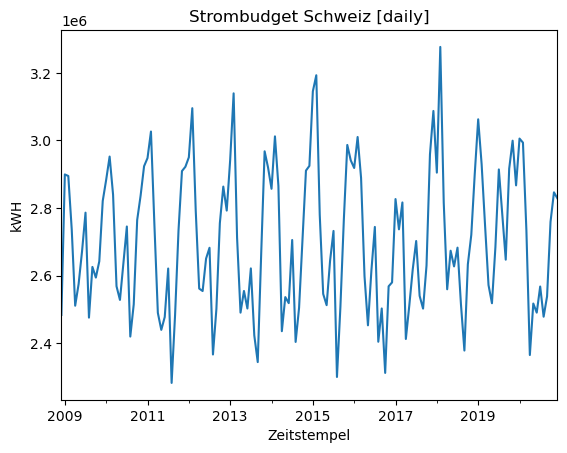

In [7]:
data_m['Strombudget Schweiz'].plot.line(ylabel='kWH', title='Strombudget Schweiz [daily]')
plt.show()

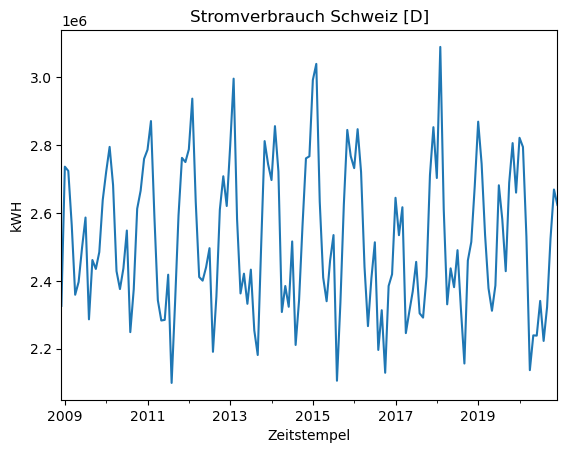

In [8]:
data_m['Stromverbrauch Schweiz'].plot.line(ylabel='kWH', title='Stromverbrauch Schweiz [D]')
plt.show()

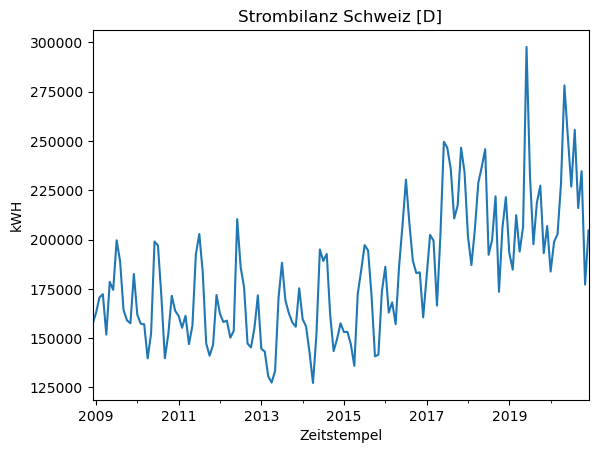

In [9]:
data_m['Strombilanz Schweiz'].plot.line(ylabel='kWH', title='Strombilanz Schweiz [D]')
plt.show()

##### Autocorrelation
We first would like to look at the yearly seasonality. This is done easiest with the a monthly resolution.

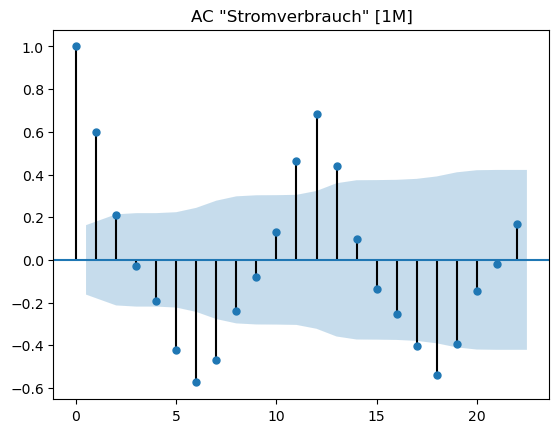

In [10]:
plot_acf(data_m['Stromverbrauch Schweiz'], title='AC "Stromverbrauch" [1M]')
plt.show()

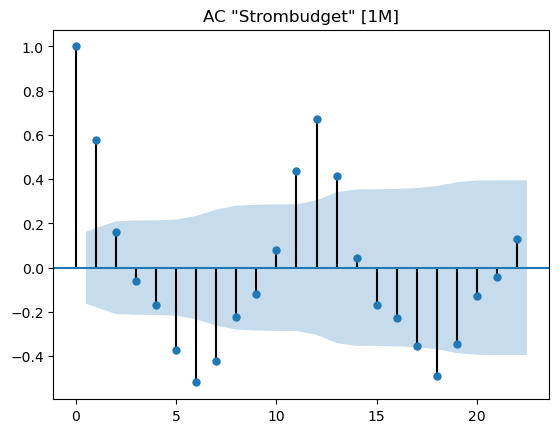

In [11]:
plot_acf(data_m['Strombudget Schweiz'], title='AC "Strombudget" [1M]')
plt.show()

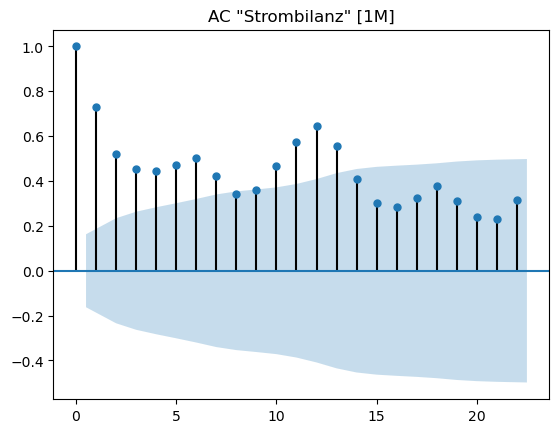

In [12]:
plot_acf(data_m['Strombilanz Schweiz'], title='AC "Strombilanz" [1M]')
plt.show()

As expected, we see a yearly seasonality in the budget and usage of electricity. Interestingly, the Balance also seems to follow a yearly cycle. We can see that they all have a peak at the lag of around 12, which is a year in months.

#### 4 Hour Data
For the 4 Hour Data, we will look more into the daily seasonality, thus only at a sub-sample at a time of the overall data.

In [13]:
ROWS_TO_PLOT = 20

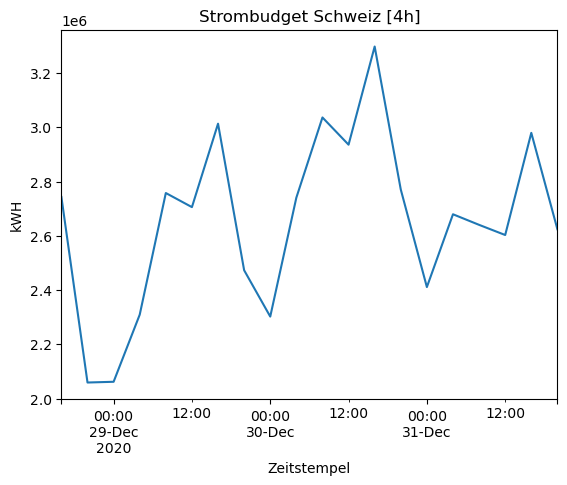

In [14]:
data_4h['Strombudget Schweiz'].tail(ROWS_TO_PLOT).plot.line(ylabel='kWH', title='Strombudget Schweiz [4h]')
plt.show()

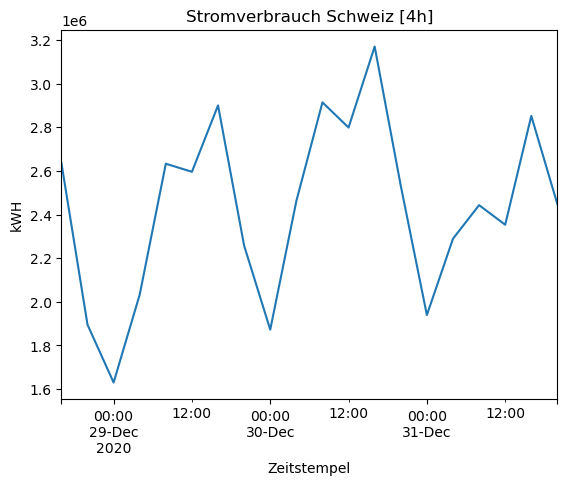

In [15]:
data_4h['Stromverbrauch Schweiz'].tail(ROWS_TO_PLOT).plot.line(ylabel='kWH', title='Stromverbrauch Schweiz [4h]')
plt.show()

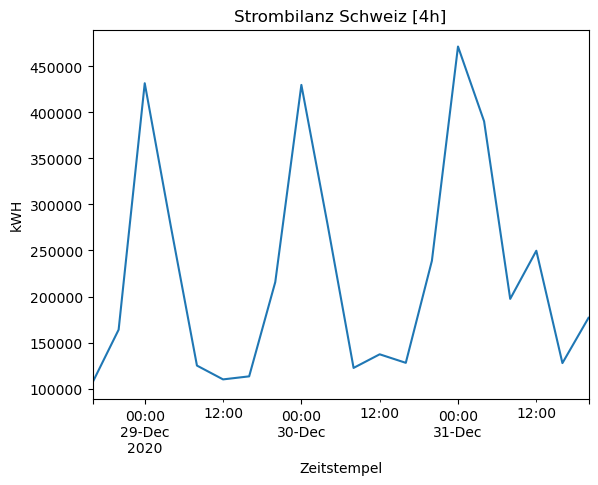

In [16]:
data_4h['Strombilanz Schweiz'].tail(ROWS_TO_PLOT).plot.line(ylabel='kWH', title='Strombilanz Schweiz [4h]')
plt.show()

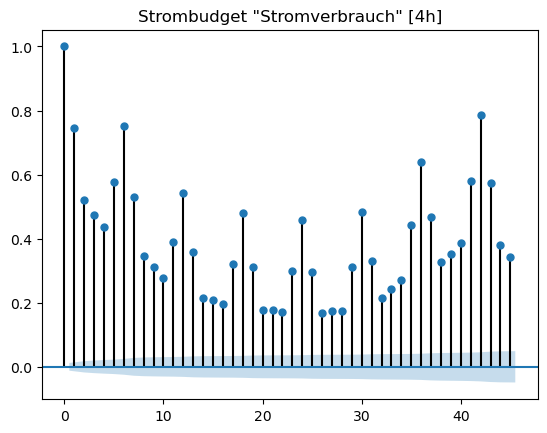

In [17]:
plot_acf(data_4h['Strombudget Schweiz'], title='Strombudget "Stromverbrauch" [4h]')
plt.show()

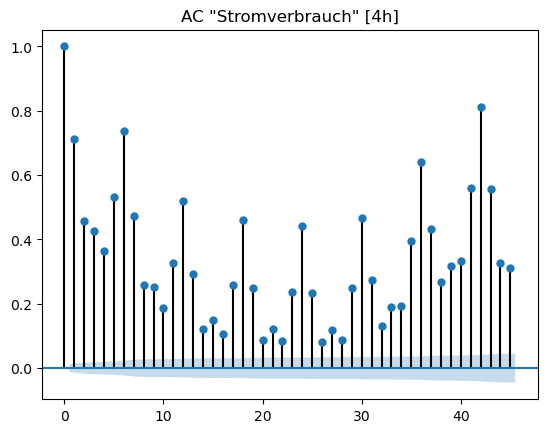

In [18]:
plot_acf(data_4h['Stromverbrauch Schweiz'], title='AC "Stromverbrauch" [4h]')
plt.show()

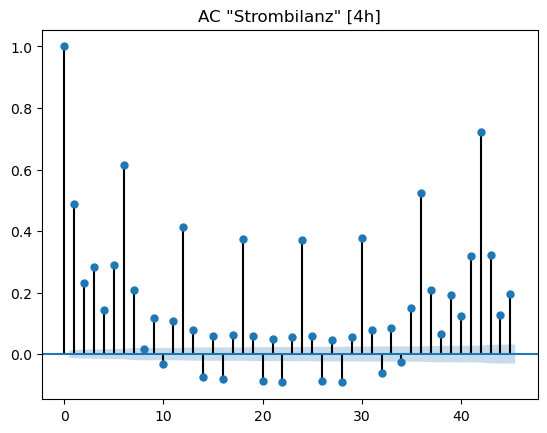

In [19]:
plot_acf(data_4h['Strombilanz Schweiz'], title='AC "Strombilanz" [4h]')
plt.show()

As expected, we see a daily trend because the lag peaks at an intervall of 6. 6*4 = 24 = 1 Day. As seen in the line plots above, the "Strombilanz" clearly shows a strong spike at 00:00 each day. 

#### Hourly data averaged over multiple years
Above we only looked at a subsample. The trend should also be seeable if we take the average of the hourly data over multiple years.

In [20]:
data_4h_average = data_4h.copy()
data_4h_average['datetime'] = data_4h_average.index.strftime("%d-%m %H:%M")
data_4h_average = data_4h_average.groupby(data_4h_average.datetime).mean()

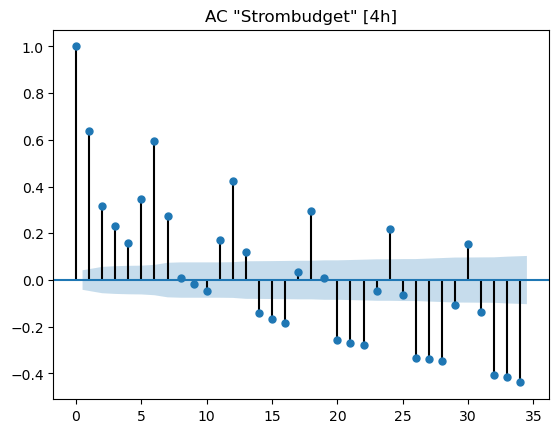

In [21]:
plot_acf(data_4h_average['Strombudget Schweiz'], title='AC "Strombudget" [4h]')
plt.show()

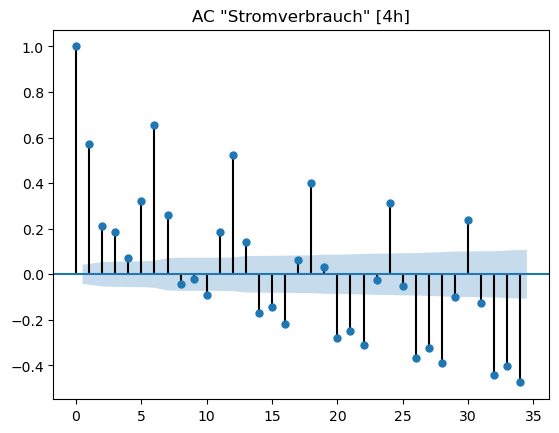

In [22]:
plot_acf(data_4h_average['Stromverbrauch Schweiz'], title='AC "Stromverbrauch" [4h]')
plt.show()

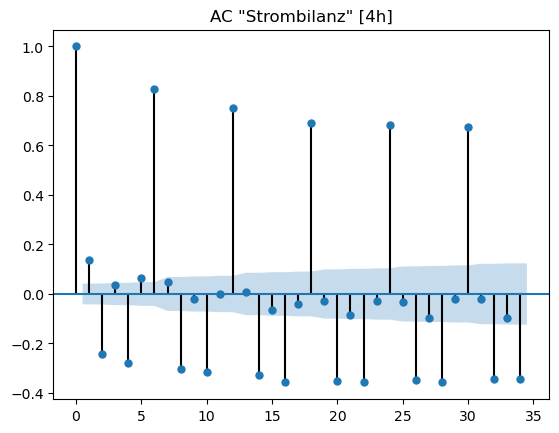

In [23]:
plot_acf(data_4h_average['Strombilanz Schweiz'], title='AC "Strombilanz" [4h]')
plt.show()

Es hat sich gelohnt, sich das auch unabhängig vom Jahr anzuschauen. Wir sehen auch hier den Lag von 6, was einem Tag entspricht.

## Sesonal decomposition
### Jährliche Seasonalität
Wir schauen uns die jährliche Seasonalität anhand unseren 4-Stunden sampling an. Wir nehmen als Periode 6\*356, da dies den Lags eines Jahres entspricht, wenn man mit einem 4 Stunden sampling arbeitet.

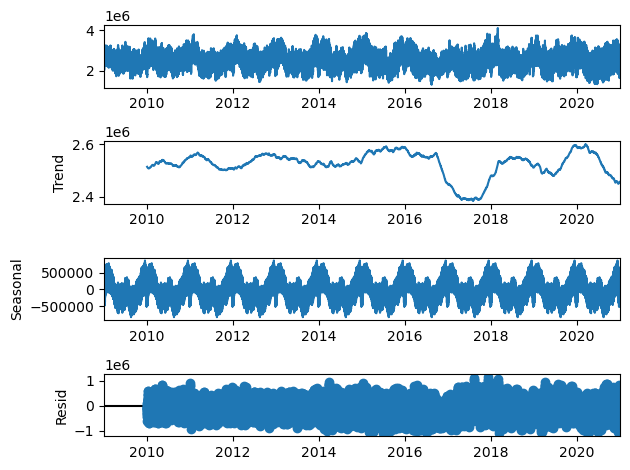

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


analysis = data_4h[['Stromverbrauch Schweiz']].copy()


decompose_result_verbrauch = seasonal_decompose(analysis, model="additive", period=6*365, two_sided=False)


decompose_result_verbrauch.plot()
plt.show()

Dies sieht schon sehr gut aus! Man kann anhand der Grösse der Amplitude der Seasonalität und des Trends sehen, dass die Aufteilung erfolgreich war. Schauen wir uns nun das Budget an.

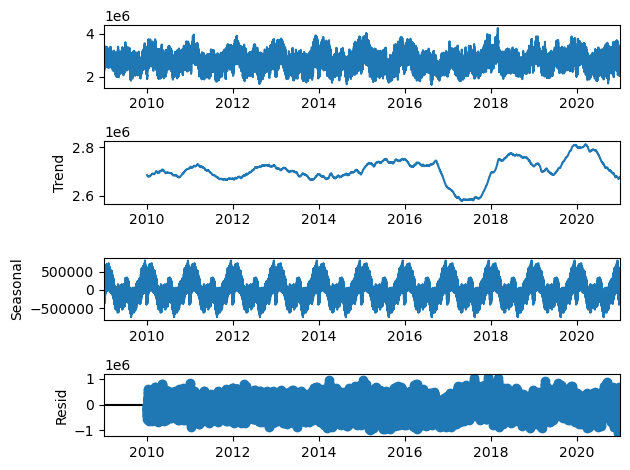

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose


analysis = data_4h[['Strombudget Schweiz']].copy()


decompose_result_budget = seasonal_decompose(analysis, model="additive", period=6*365, two_sided=False)

decompose_result_budget.plot()
plt.show()

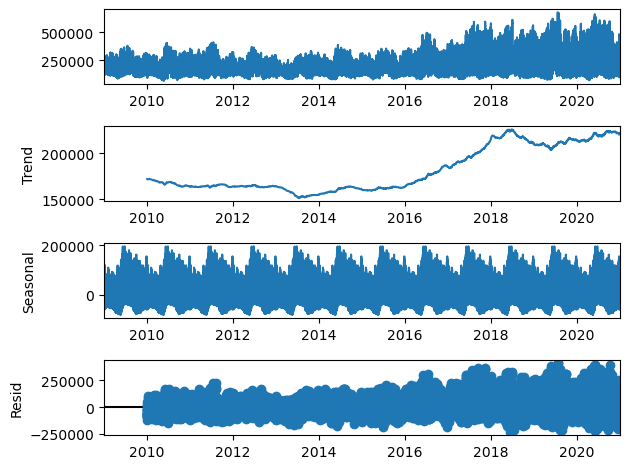

In [26]:
analysis = data_4h[['Strombilanz Schweiz']].copy()


decompose_result_balance = seasonal_decompose(analysis, model="additive", period=6*365, two_sided=False)

decompose_result_balance.plot()
plt.show()

Diese beiden sehen sehr ähnlich aus. Was passiert, wenn man die beiden Trends voneinander abzieht?

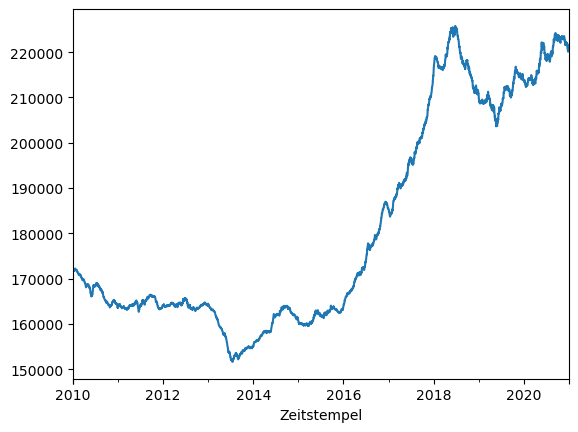

In [27]:
decompose_result_balance = (decompose_result_budget.trend - decompose_result_verbrauch.trend).dropna()
decompose_result_balance.plot.line()
plt.show()

Wir sehen, dass das Budget im Allgemeinen zunimmt. Im Zeitraum von 2013-2015 finden sich viele Artikel über die Gefahr eines grossflächigen Stromausfalls. Ob es da einen Zusammenhang gibt? 

#### Vorhersage des Verbrauchs
Eine Vorhersage des Verbrauchs kann man durch eine Lineare Regressions des Trends erzeugen. Wir können es aber auch einfach machen und den Durchschnitt des Trends nehmen. Die Seasonalität nehmen wir als Grundbaustein. Um die Verteilung der Residuen zu erkennen, nehmen wir den QQ-Plot zur verfügung.

Best dist: norm


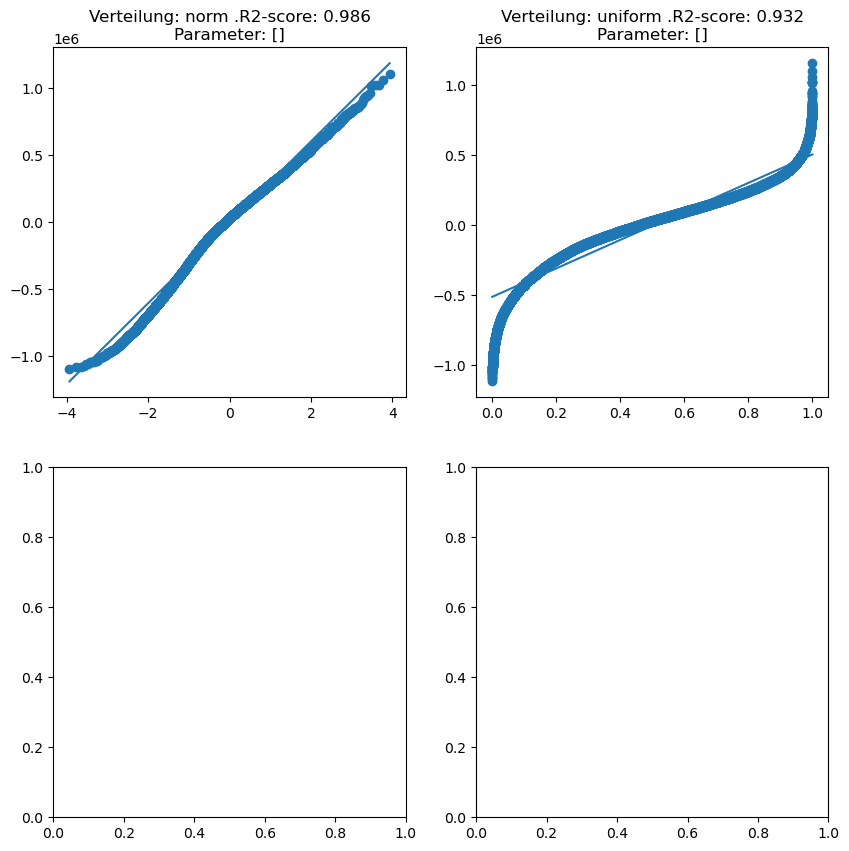

In [38]:
VERTEILUNGEN = [stats.norm, stats.uniform]
easy_qq(VERTEILUNGEN, decompose_result_verbrauch.resid.dropna())
plt.show()

Die beste Verteilung ist also die normalverteilung.

In [63]:
norm_dist = stats.norm
mean, std = norm_dist.fit(decompose_result_verbrauch.resid.dropna())
print(f'Mean: {mean}. Std: {std}')
norm_dist.rvs(size=1, loc=mean, scale=std)

Mean: -2042.4099749168565. Std: 304318.1373240541


array([-339107.53328968])

In [70]:
prediction = decompose_result_verbrauch.seasonal.copy()
prediction.index = prediction.index + pd.Timedelta('1Y')
prediction = decompose_result_verbrauch.trend.mean() + prediction + norm_dist.rvs(size=len(prediction), loc=mean, scale=std)

C:\Users\vince\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


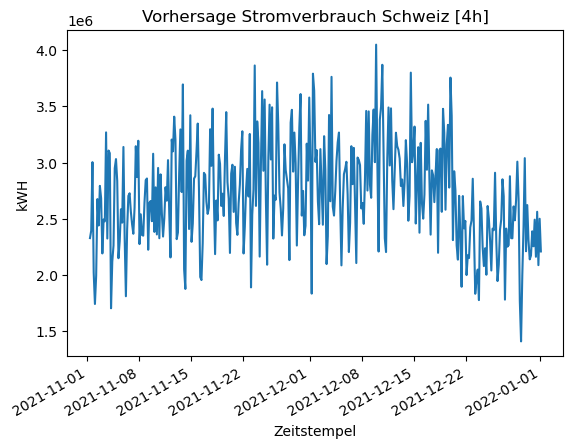

In [71]:
prediction.tail(365).plot.line(ylabel='kWH', title='Vorhersage Stromverbrauch Schweiz [4h]')
plt.show()

In [33]:
# Bei trend lineares modell. Glatte Komponente (Trend <-> Glatte Komponente. Trend noch auseinander nehmen. Arima Forcast vs. eigene Forcast (siehe nächste Zeilen))
# 1. Baseline lineares modell
# 2. Wirtschaftskrise 2022
# Prognose auf Tag
# Arima auf Komponenten und alles und vergleichen mit Decompose.
# Forcast generieren aus Trend prediction + season + resid.
# Forecast with seasonal decomposition?

Zeitstempel
2009-01-01   NaN
2009-01-02   NaN
2009-01-03   NaN
2009-01-04   NaN
2009-01-05   NaN
              ..
2021-12-06   NaN
2021-12-07   NaN
2021-12-08   NaN
2021-12-09   NaN
2021-12-10   NaN
Name: resid, Length: 364, dtype: float64

<AxesSubplot:ylabel='Frequency'>

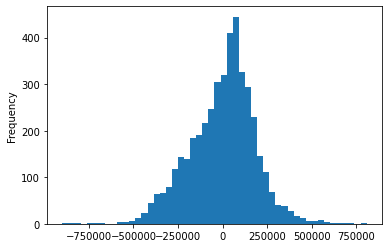

In [194]:
residual.plot.hist(bins=50)

In [166]:
def mean_excess_function(series, threshold):

    me = np.sum((series-threshold)) / np.sum(np.where(series > threshold, 1, 0))

    return me


In [167]:
mean_excess_function(residual.dropna(), 50000)

-117020.33609570806

In [207]:
mes = []
thress = []
for thres in np.linspace(0, residual.max()*2, 200):
    thress.append(thres)
    mes.append(mean_excess_function(residual.dropna(), thres))

C:\Users\vince\AppData\Local\Temp/ipykernel_14772/1694940441.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  me = np.sum((series-threshold)) / np.sum(np.where(series > threshold, 1, 0))


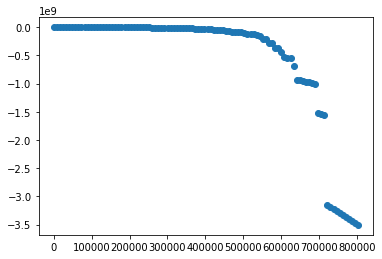

In [208]:
plt.scatter(thress, mes)

In [189]:
def hill_schaetzer(series, k):
    assert k >= 2
    series = np.sort(series)[::-1]
    xi = 0
    for j in range(1, k+1):
        xi += np.log(series[j] / series[k])
    return xi / k

In [200]:
hill_schaetzer(residual.dropna(), 200)

0.2699543390113257

In [196]:
xis = []
ks = []
for k in range(2, 4363):
    ks.append(k)
    xis.append(hill_schaetzer(residual.dropna(), k))

C:\Users\vince\AppData\Local\Temp/ipykernel_14772/153288786.py:6: RuntimeWarning: invalid value encountered in log
  xi += np.log(series[j] / series[k])


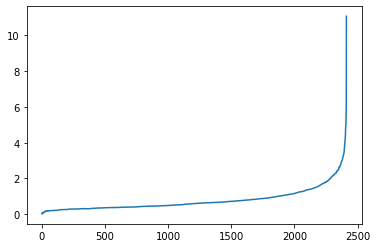

In [197]:
plt.plot(ks, xis)

In [52]:
# Create list of distributions to check for (from https://www.acsu.buffalo.edu/~adamcunn/probability/probability.html)
dists = [stats.randint, stats.bernoulli, stats.hypergeom, stats.binom, stats.cauchy, stats.t, stats.f, stats.poisson,
         stats.norm,stats.chi2, stats.beta,stats.uniform, stats.nbinom, stats.geom, stats.lognorm, stats.gamma, 
         stats.expon, stats.logistic, stats.pareto, stats.laplace, stats.wei]

#GEV-verteilungen, pareto-verteilung, pareto nur auf extremwerte (~10%)

# Produktionsfunktion ändern auf 70% Allgemein und 30% Solar -> Annahme lineare abnahme zwischen sommer und winter. In der nacht wird kein Strom verbraucht.

C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\vince\AppData\Local\Temp/ipykernel_14772/2274346076.py:49: RuntimeWarning: invalid value encountered in log
  data = np.log(data)


Best dist: t


C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\vince\anaconda3\envs\SPZ\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


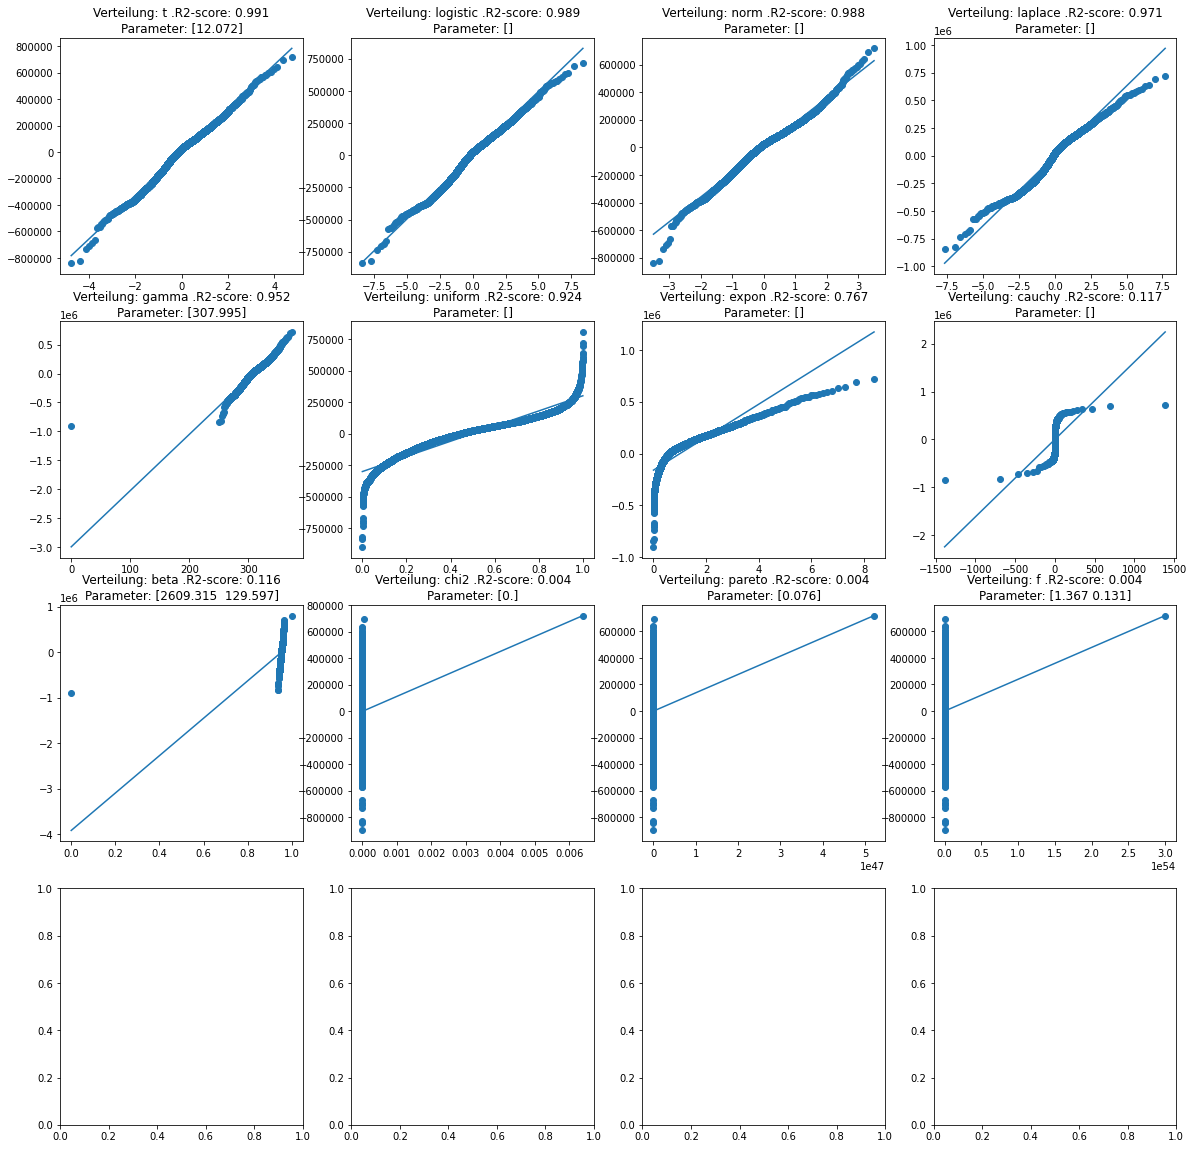

In [53]:
best_r2_score, best_dist, r2_score, unusable_dist, error_messages, distargs = loop_qq(dists, residual.dropna())
# t-verteilung wiederkehrtwert/periode, subsample > x, t-verteilung 
# Generalized extremvalue distrubtion GEV, weibull, gumbel, Fréchet

In [126]:
# fit parameters to data
PERCENT_OF_VALUES = 0.9999
distargs = best_dist.fit(residual.dropna())

#generate sample with same parameters as input data
sample = best_dist.rvs(*distargs, size = 10000)
sample

array([-260999.35811798,  129741.24386287, -144510.52523487, ...,
        131688.36867108, -247153.80498447,   51947.36733538])

In [144]:
f"In {100*PERCENT_OF_VALUES}% of Days the usage will fall between {best_dist.interval(PERCENT_OF_VALUES, *distargs)}. Values outside of this area will happen every {1/(1-PERCENT_OF_VALUES)} Days."

'In 99.99% of Days the usage will fall between (-936337.7611382168, 944081.10925479). Values outside of this area will happen every 10000.0000000011 Days.'

In [136]:
# fit parameters to data
KWH = 1e6
distargs = best_dist.fit(residual.dropna())

In [138]:
best_dist.cdf(KWH, *distargs)

0.9999705054648296

In [143]:
f"Every {1/(1-best_dist.cdf(KWH, *distargs))} Days we can except to see an usage above {KWH}. It corresponds to a chance of {(1-best_dist.cdf(KWH, *distargs))*100}%."

'Every 33904.585857066435 Days we can except to see an usage above 1000000.0. It corresponds to a chance of 0.0029494535170426772%.'

In [ ]:
# Daily decompose
# Windenergie und/oder Sonne hinzufügen -> wie ändert sich Extremwerte?